In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset (replace 'path_to_spam_dataset.csv' with the actual path to your dataset)
dataset = pd.read_csv('spams2.csv')

# Display the first few rows of the dataset
print(dataset.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [22]:
X = dataset['Message']
y = dataset['Category']

In [23]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [24]:
# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [25]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Validation Set Evaluation
y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

# Training set

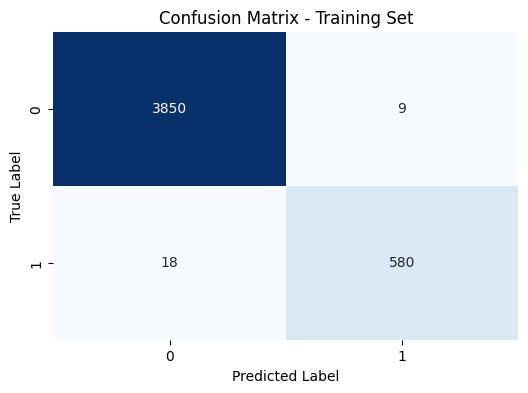

In [26]:
# Confusion Matrix
cm_val = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
# Classification Report for Training Set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

# Accuracy for Training Set
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy - Training Set:", accuracy_train)

# Precision for Training Set
precision_train = precision_score(y_train, y_train_pred, pos_label='spam')
print("Precision - Training Set:", precision_train)

# Recall for Training Set
recall_train = recall_score(y_train, y_train_pred, pos_label='spam')
print("Recall - Training Set:", recall_train)


Classification Report - Training Set:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3859
        spam       0.98      0.97      0.98       598

    accuracy                           0.99      4457
   macro avg       0.99      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457

Accuracy - Training Set: 0.9939421135292797
Precision - Training Set: 0.9847198641765704
Recall - Training Set: 0.9698996655518395


# Validation set

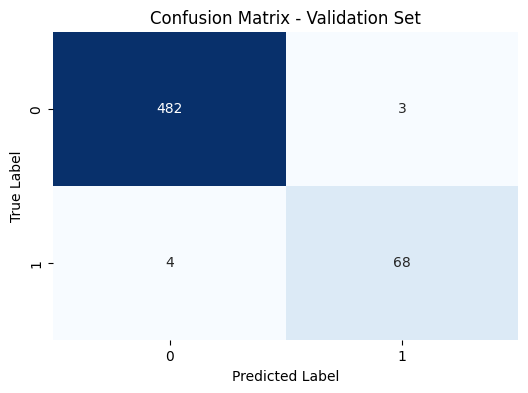

In [28]:
# Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
# Classification Report
print("Classification Report - Validation Set:")
print(classification_report(y_val, y_val_pred))

# Accuracy
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Accuracy - Validation Set:", accuracy_val)

# Precision
precision_val = precision_score(y_val, y_val_pred, pos_label='spam')
print("Precision - Validation Set:", precision_val)

# Recall
recall_val = recall_score(y_val, y_val_pred, pos_label='spam')
print("Recall - Validation Set:", recall_val)

Classification Report - Validation Set:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       485
        spam       0.96      0.94      0.95        72

    accuracy                           0.99       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.99      0.99      0.99       557

Accuracy - Validation Set: 0.9874326750448833
Precision - Validation Set: 0.9577464788732394
Recall - Validation Set: 0.9444444444444444


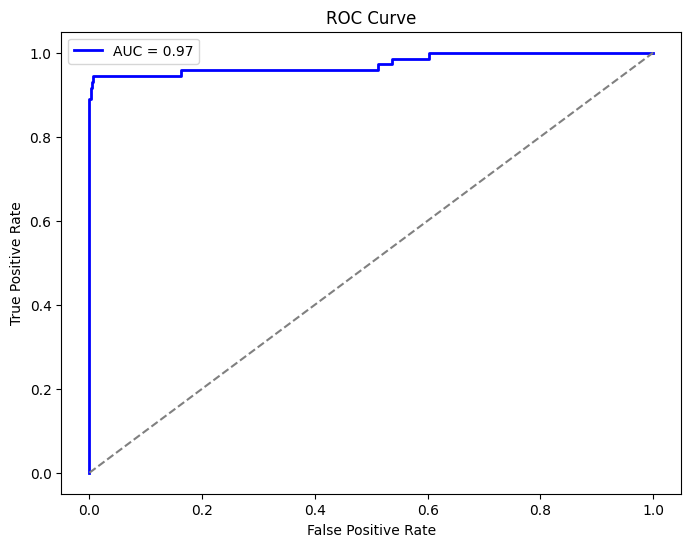

In [35]:
# Convert 'ham' and 'spam' labels to binary labels
label_encoder = LabelEncoder()
y_val_binary = label_encoder.fit_transform(y_val)
y_val_pred_binary = label_encoder.transform(y_val_pred)

# Generating ROC curve
fpr, tpr, _ = roc_curve(y_val_binary, model.predict_proba(X_val)[:, 1])
auc = roc_auc_score(y_val_binary, model.predict_proba(X_val)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Test set

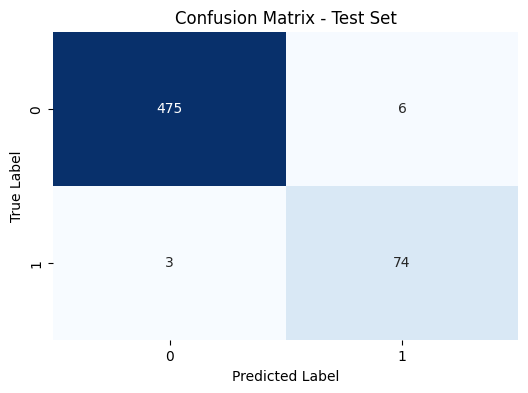

In [31]:
# Test Set Evaluation
y_test_pred = model.predict(X_test)

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
# Classification Report
print("Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred))

# Accuracy
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy - Test Set:", accuracy_test)

# Precision
precision_test = precision_score(y_test, y_test_pred, pos_label='spam')
print("Precision - Test Set:", precision_test)

# Recall
recall_test = recall_score(y_test, y_test_pred, pos_label='spam')
print("Recall - Test Set:", recall_test)

Classification Report - Test Set:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       481
        spam       0.93      0.96      0.94        77

    accuracy                           0.98       558
   macro avg       0.96      0.97      0.97       558
weighted avg       0.98      0.98      0.98       558

Accuracy - Test Set: 0.9838709677419355
Precision - Test Set: 0.925
Recall - Test Set: 0.961038961038961
